### Marie McCrary
The goal of this notebook is to load temperature observations from the Arctic Red River station in the Mackenzie River, plot the monthly mean, max, and min, and to calculate and plot the monthly trend.

In [29]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import datetime
from matplotlib import pyplot as plt


%matplotlib inline

Data are from Environment and Climate Change Canada: https://open.canada.ca/data/en/dataset/0177c195-13a8-4078-aa85-80b17e9e2cfe

In [30]:
d = pd.read_csv("Mackenzie_UN.csv", parse_dates=[1], encoding='latin-1', index_col=[1]) 
d = pd.DataFrame(data=d) 

In [31]:
for col in d.columns:
    print(col)

SITE_NO
FLAG_MARQUEUR
VALUE_VALEUR
SDL_LDE
MDL_LDM
VMV_CODE
UNIT_UNITE
VARIABLE
VARIABLE_FR
STATUS_STATUT


In [32]:
df = d.loc[d['VARIABLE'].isin(['TEMPERATURE WATER'])]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2000-01-30 14:15:00 to 2016-07-27 14:30:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_NO        1469 non-null   object 
 1   FLAG_MARQUEUR  0 non-null      object 
 2   VALUE_VALEUR   1469 non-null   float64
 3   SDL_LDE        33 non-null     float64
 4   MDL_LDM        0 non-null      float64
 5   VMV_CODE       1469 non-null   int64  
 6   UNIT_UNITE     1469 non-null   object 
 7   VARIABLE       1469 non-null   object 
 8   VARIABLE_FR    1469 non-null   object 
 9   STATUS_STATUT  1469 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 126.2+ KB


In [34]:

df['temp'] = df['VALUE_VALEUR'].astype(float, errors = 'raise')
df = df.sort_index()


<ipython-input-34-f7542e8f6411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df['VALUE_VALEUR'].astype(float, errors = 'raise')


In [35]:

df.temp.count()

1469

There are 1469 temperature readings

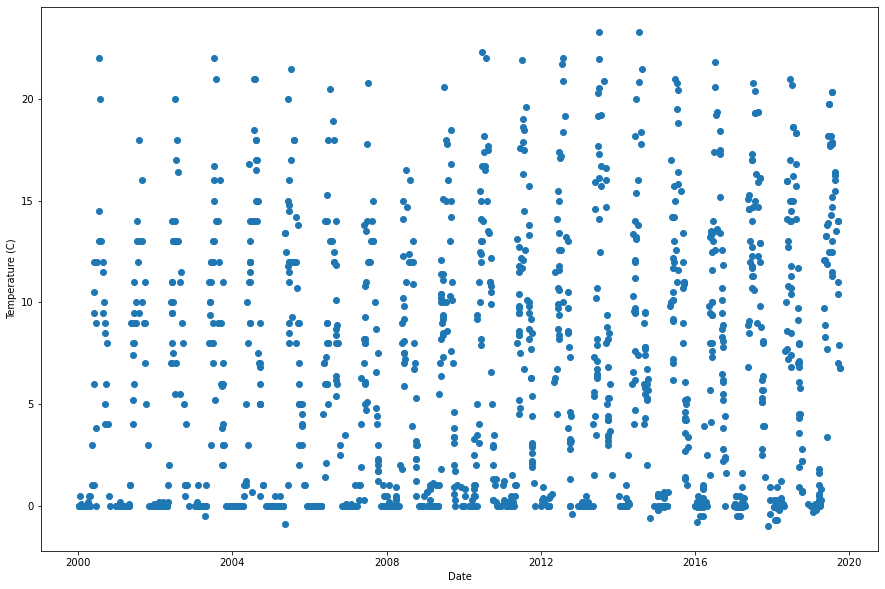

In [36]:
fig, ax = plt.subplots(figsize=[15, 10])

ax.scatter(df.index.values, df.temp)
ax.set(xlabel="Date",
       ylabel="Temperature (C)")

plt.show()

Text(0, 0.5, 'Temperature (C)')

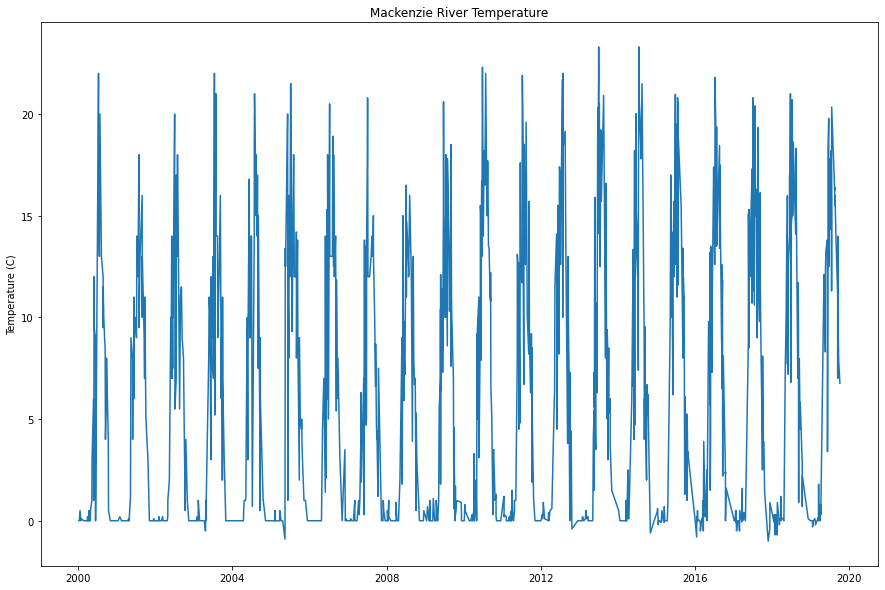

In [37]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.set_title('Mackenzie River Temperature')
ax.plot(df.temp)
ax.set_ylabel('Temperature (C)')


In [38]:
monthly_mean_T = df['temp'].groupby(df.index.month).mean()
monthly_min_T = df.groupby(df.index.month).agg(monthly_min_T=pd.NamedAgg(column = 'temp', aggfunc = min))
monthly_max_T = df.groupby(df.index.month).agg(monthly_max_T=pd.NamedAgg(column = 'temp', aggfunc = max))

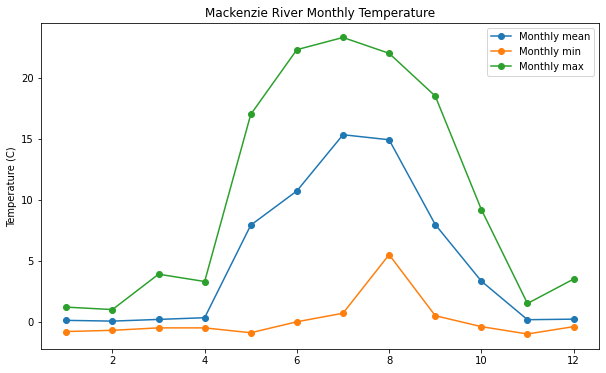

In [39]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.set_title('Mackenzie River Monthly Temperature')
ax.plot(monthly_mean_T, marker = 'o')
ax.plot(monthly_min_T, marker = 'o')
ax.plot(monthly_max_T, marker = 'o')
ax.set_ylabel('Temperature (C)')
ax.legend(('Monthly mean', 'Monthly min', 'Monthly max'))

Text(0.5, 0, 'Month')

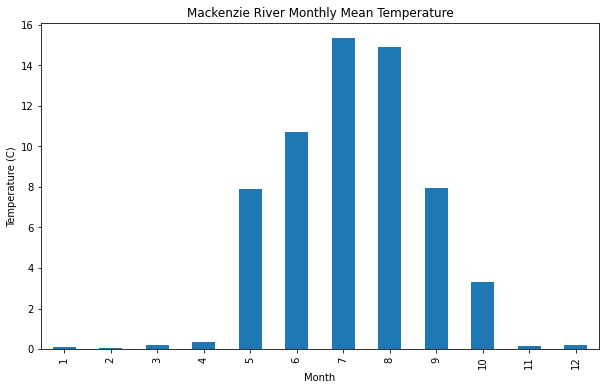

In [70]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.set_title('Mackenzie River Monthly Mean Temperature')

df['temp'].groupby(df.index.month).mean().plot(kind='bar')
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Month')

In [41]:
# How many data points for each month
df.temp.groupby(df.index.month).count()

DATE_TIME_HEURE
1     111
2      98
3     172
4      99
5     116
6     250
7     148
8      85
9     202
10    133
11     20
12     35
Name: temp, dtype: int64

In [67]:
jan = df.loc[df.index.month==1].temp.resample('Y').mean().dropna()
jan.index = jan.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(jan.index)),jan,1,full=True)
mse = residuals[0]/(len(jan.index)) # mean square error
nrmse = np.sqrt(mse)/(jan.max() - jan.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
jan_trend = coefficients[0]

trend = 0.0015780173877918266
NRMSE: 0.24111977626008718


In [56]:
feb = df.loc[df.index.month==2].temp.resample('Y').mean().dropna()
feb.index = feb.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(feb.index)),feb,1,full=True)
mse = residuals[0]/(len(feb.index)) # mean square error
nrmse = np.sqrt(mse)/(feb.max() - feb.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
feb_trend = coefficients[0]                    

trend = -0.004279949874686715
NRMSE: 0.19881236793620555


In [55]:
mar = df.loc[df.index.month==3].temp.resample('Y').mean().dropna()
mar.index = mar.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(mar.index)),mar,1,full=True)
mse = residuals[0]/(len(mar.index)) # mean square error
nrmse = np.sqrt(mse)/(mar.max() - mar.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
mar_trend = coefficients[0]

trend = 0.018809139398613083
NRMSE: 0.2535557686552055


In [57]:
apr = df.loc[df.index.month==4].temp.resample('Y').mean().dropna()
apr.index = apr.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(apr.index)),apr,1,full=True)
mse = residuals[0]/(len(apr.index)) # mean square error
nrmse = np.sqrt(mse)/(apr.max() - apr.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
apr_trend = coefficients[0]

trend = 0.01253097028284998
NRMSE: 0.3173229596939308


In [58]:
may = df.loc[df.index.month==5].temp.resample('Y').mean().dropna()
may.index = may.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(may.index)),may,1,full=True)
mse = residuals[0]/(len(may.index)) # mean square error
nrmse = np.sqrt(mse)/(may.max() - may.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
may_trend = coefficients[0]

trend = 0.29410420097863704
NRMSE: 0.21638048239941102


In [59]:
jun = df.loc[df.index.month==6].temp.resample('Y').mean().dropna()
jun.index = jun.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(jun.index)),jun,1,full=True)
mse = residuals[0]/(len(jun.index)) # mean square error
nrmse = np.sqrt(mse)/(jun.max() - jun.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
jun_trend = coefficients[0]

trend = 0.2133895833465272
NRMSE: 0.19331532970520982


In [60]:
jul = df.loc[df.index.month==7].temp.resample('Y').mean().dropna()
jul.index = jul.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(jul.index)),jul,1,full=True)
mse = residuals[0]/(len(jul.index)) # mean square error
nrmse = np.sqrt(mse)/(jul.max() - jul.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
jul_trend = coefficients[0]

trend = 0.1117960453080755
NRMSE: 0.273090892694252


In [61]:
aug = df.loc[df.index.month==8].temp.resample('Y').mean().dropna()
aug.index = aug.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(aug.index)),aug,1,full=True)
mse = residuals[0]/(len(aug.index)) # mean square error
nrmse = np.sqrt(mse)/(aug.max() - aug.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
aug_trend = coefficients[0]

trend = 0.2895374722520587
NRMSE: 0.19381290041861868


In [62]:
sep = df.loc[df.index.month==9].temp.resample('Y').mean().dropna()
sep.index = sep.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(sep.index)),sep,1,full=True)
mse = residuals[0]/(len(sep.index)) # mean square error
nrmse = np.sqrt(mse)/(sep.max() - sep.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
sep_trend = coefficients[0]

trend = 0.10621283382448811
NRMSE: 0.26968730400959867


In [63]:
oc = df.loc[df.index.month==10].temp.resample('Y').mean().dropna()
oc.index = oc.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(oc.index)),oc,1,full=True)
mse = residuals[0]/(len(oc.index)) # mean square error
nrmse = np.sqrt(mse)/(oc.max() - oc.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
oct_trend = coefficients[0]

trend = 0.13071093805943435
NRMSE: 0.2329197513913826


In [64]:
nov = df.loc[df.index.month==11].temp.resample('Y').mean().dropna()
nov.index = nov.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(nov.index)),nov,1,full=True)
mse = residuals[0]/(len(nov.index)) # mean square error
nrmse = np.sqrt(mse)/(nov.max() - nov.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
nov_trend = coefficients[0]

trend = -0.021978021978021952
NRMSE: 0.23849060439661077


In [65]:
dec = df.loc[df.index.month==12].temp.resample('Y').mean().dropna()
dec.index = dec.index.map(datetime.date.toordinal)

coefficients, residuals, _, _, _ = np.polyfit(range(len(dec.index)),dec,1,full=True)
mse = residuals[0]/(len(dec.index)) # mean square error
nrmse = np.sqrt(mse)/(dec.max() - dec.min()) #standard deviation of residuals
print('trend = ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
dec_trend = coefficients[0]

trend = 0.005893772893772894
NRMSE: 0.3142477607263566


<AxesSubplot:>

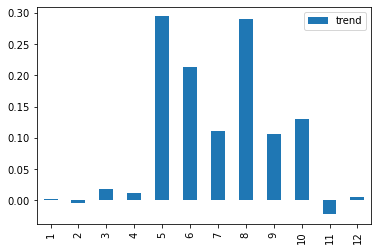

In [68]:
plotdata = pd.DataFrame(
    {"trend": [jan_trend, feb_trend, mar_trend, apr_trend, may_trend, jun_trend, jul_trend, aug_trend, sep_trend, oct_trend, nov_trend, dec_trend]}, 
    index=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])
# Plot a bar chart
plotdata.plot(kind="bar")

## Put it all together in one figure... the grand finale

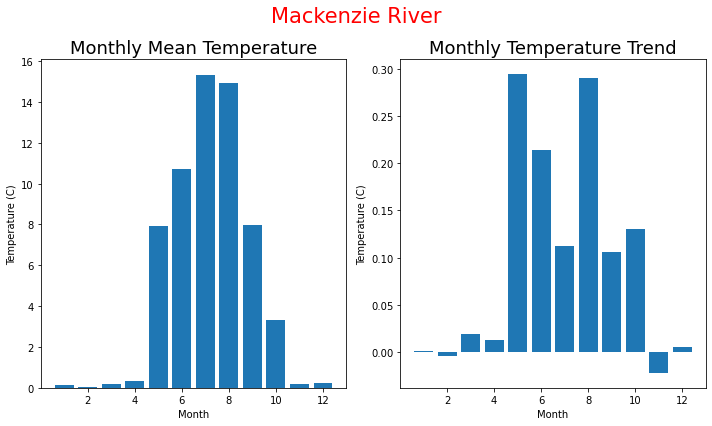

In [91]:
fig = plt.figure(figsize=(10,6))


# First plot
plt.subplot(121)
x = range(1,13)
plot1 = plt.bar(x, df['temp'].groupby(df.index.month).mean())
plt.ylabel('Temperature (C)')
plt.xlabel('Month')
plt.title('Monthly Mean Temperature', fontsize=18)



# Second plot

plt.subplot(122)
x = range(1,13)
plot1 = plt.bar(x, [jan_trend, feb_trend, mar_trend, apr_trend, may_trend, jun_trend, jul_trend, aug_trend, sep_trend, oct_trend, nov_trend, dec_trend])
plt.ylabel('Temperature (C)')
plt.xlabel('Month')
plt.title('Monthly Temperature Trend', fontsize=18)

fig.suptitle('Mackenzie River', fontsize=21, color='r')
fig.tight_layout()